In [139]:
# Importing important liberaries.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [140]:
df = pd.read_csv('titanic.csv') # Reading dataset.
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [141]:
df.shape # Shape of dataset

(891, 12)

In [142]:
df.isnull().sum() # Finding null value.

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

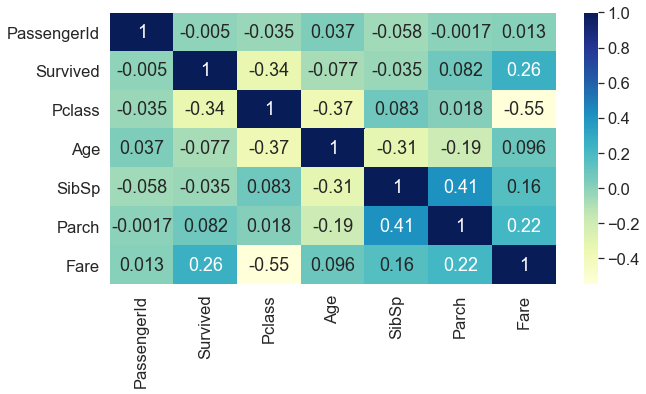

In [143]:
# Pltting heatmap of correlation of variables.
plt.figure(figsize=(10,5))
sns.set(font_scale=1.5)
corr=df.corr()
sns.heatmap(corr,annot=True,cmap='YlGnBu')

In [144]:
# Dropping useless columns.
df.drop(['PassengerId','Pclass','Name','SibSp','Parch','Ticket','Cabin','Embarked'],axis=1,inplace=True) 

In [145]:
df.head()

,Survived,Sex,Age,Fare
0,0,male,22.0,7.2500
1,1,female,38.0,71.2833
2,1,female,26.0,7.9250
3,1,female,35.0,53.1000
4,0,male,35.0,8.0500


In [146]:
input = df.drop('Survived',axis=1) # sepearting dependent & independent variable.
target= df['Survived']

In [147]:
input

,Sex,Age,Fare
0,male,22.0,7.2500
1,female,38.0,71.2833
2,female,26.0,7.9250
3,female,35.0,53.1000
4,male,35.0,8.0500
...,...,...,...
886,male,27.0,13.0000
887,female,19.0,30.0000
888,female,NaN,23.4500
889,male,26.0,30.0000


In [148]:
input.fillna(input['Age'].mean(),inplace=True # fill null values with mean.

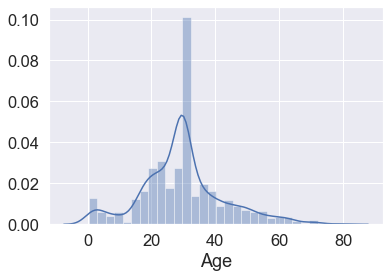

In [149]:
sns.distplot(input['Age']) # Distplot of 'Age' variable.

In [150]:
input.describe() # describing basic statistics.

,Age,Fare
count,891.000000,891.000000
mean,29.699118,32.204208
std,13.002015,49.693429
min,0.420000,0.000000
25%,22.000000,7.910400
50%,29.699118,14.454200
75%,35.000000,31.000000
max,80.000000,512.329200


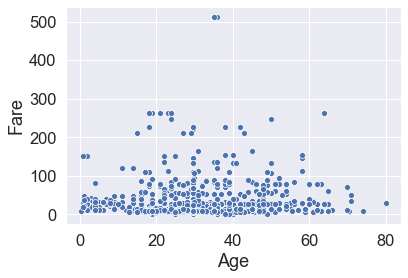

In [151]:
sns.set_style('darkgrid')
sns.scatterplot(x='Age',y='Fare',data=input) # Plotting scatterplot of 'Age' & 'Fare' variable.

In [152]:
from sklearn.preprocessing import LabelEncoder # Importing Label Encoder

In [153]:
sex_encoder = LabelEncoder()

In [154]:
input['Sex_type'] = sex_encoder.fit_transform(input['Sex']) # encoding 'Sex_type'

In [155]:
input

,Sex,Age,Fare,Sex_type
0,male,22.000000,7.2500,1
1,female,38.000000,71.2833,0
2,female,26.000000,7.9250,0
3,female,35.000000,53.1000,0
4,male,35.000000,8.0500,1
...,...,...,...,...
886,male,27.000000,13.0000,1
887,female,19.000000,30.0000,0
888,female,29.699118,23.4500,0
889,male,26.000000,30.0000,1


In [156]:
input_n = input.drop('Sex',axis=1) # Remove useless variable.

In [157]:
input_n

,Age,Fare,Sex_type
0,22.000000,7.2500,1
1,38.000000,71.2833,0
2,26.000000,7.9250,0
3,35.000000,53.1000,0
4,35.000000,8.0500,1
...,...,...,...
886,27.000000,13.0000,1
887,19.000000,30.0000,0
888,29.699118,23.4500,0
889,26.000000,30.0000,1


In [158]:
from sklearn import tree # Importing Tree


In [159]:
dt = tree.DecisionTreeClassifier() # Decision Tree Classifier

In [160]:
dt.fit(input_n,target) # fitting model.

DecisionTreeClassifier()

In [161]:
dt.score(input_n,target) # Score of model.

0.9797979797979798

In [163]:
dt.predict([[22,7,0]]) # Prediction

array([1], dtype=int64)